In [2]:
#imports

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Config lisibilité des graphiques
plt.style.use('default')
sns.set_palette("husl")

In [4]:
#Chargement des données
df = pd.read_csv("../data/Customers.csv")

In [5]:
print("Dimensions du dataset:", df.shape)
print("\nAperçu des premières lignes:")
display(df.head())
print("\nInformations sur les colonnes:")
display(df.info())

Dimensions du dataset: (7043, 21)

Aperçu des premières lignes:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

None

In [6]:
#Distribution de la variable cible
print("\nDistribution de la variable Churn:")
print(df['Churn'].value_counts(normalize=True).round(3))


Distribution de la variable Churn:
Churn
No     0.735
Yes    0.265
Name: proportion, dtype: float64


In [7]:
#1. Conversion de TotalCharges en numérique
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

Valeurs manquantes par colonne:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
#2. Analyse des variables numériques
numeric_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nStatistiques descriptives des variables numériques:")
print(df[numeric_cols].describe())


Statistiques descriptives des variables numériques:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


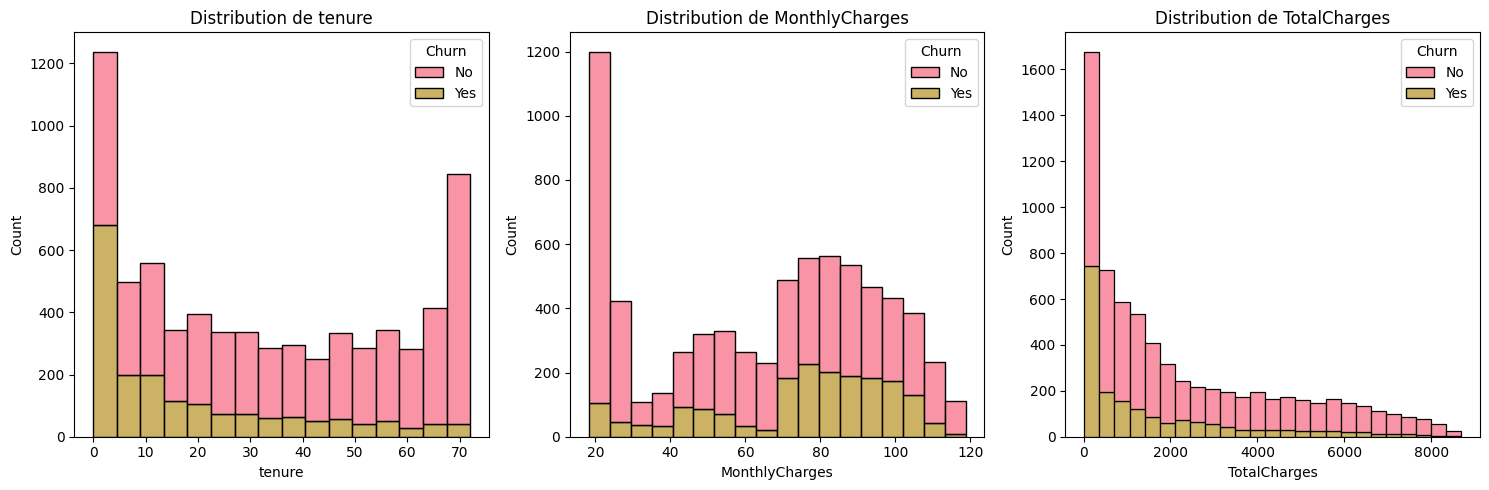

In [10]:
#3. Visualisation de la distribution des variables numériques

plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(1,3,i)
    sns.histplot(data=df, x=col, hue='Churn', multiple="stack")
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

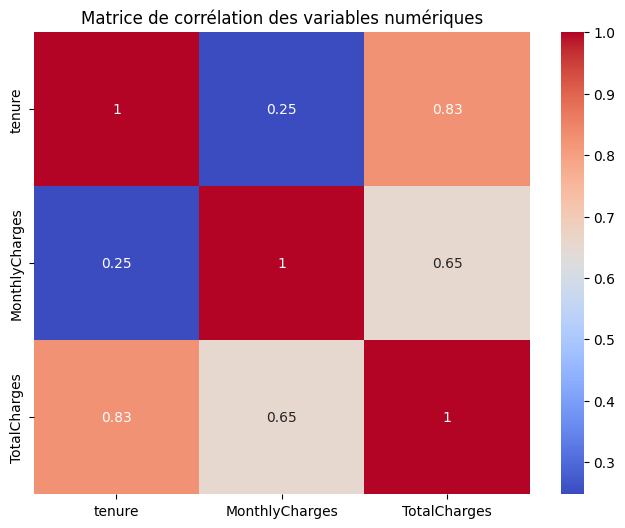

In [11]:
#4. Corrélation entre variables numériques

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

In [15]:
#1. Traitement des valeurs manquantes de TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
#2. Analyse des variables catégorielles 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID') #On ignore l'ID client

print("Distribution des variables catégorielles:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True).round(3))

Distribution des variables catégorielles:

gender:
gender
Male      0.505
Female    0.495
Name: proportion, dtype: float64

Partner:
Partner
No     0.517
Yes    0.483
Name: proportion, dtype: float64

Dependents:
Dependents
No     0.7
Yes    0.3
Name: proportion, dtype: float64

PhoneService:
PhoneService
Yes    0.903
No     0.097
Name: proportion, dtype: float64

MultipleLines:
MultipleLines
No                  0.481
Yes                 0.422
No phone service    0.097
Name: proportion, dtype: float64

InternetService:
InternetService
Fiber optic    0.440
DSL            0.344
No             0.217
Name: proportion, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     0.497
Yes                    0.287
No internet service    0.217
Name: proportion, dtype: float64

OnlineBackup:
OnlineBackup
No                     0.438
Yes                    0.345
No internet service    0.217
Name: proportion, dtype: float64

DeviceProtection:
DeviceProtection
No                     0.43